In [1]:
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import allantools

# from andbro__get_data_archive import __get_data_archive
# from andbro__querrySeismoData import __querrySeismoData

In [2]:
## --- local 

# net, sta, loc, cha = "BW.DROMY..FJV".split(".")
net, sta, loc, cha = "BW.ROMY..BJZ".split(".")

path = "/home/andbro/Documents/ROMY/monobeams/monobeam_data/"
file = f'{sta}_{cha}_2021-02-05_2.mseed'

st = obs.read(f"{path}{file}")
st

1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2021-02-05T19:00:00.005800Z - 2021-02-05T20:00:00.005800Z | 20.0 Hz, 72001 samples

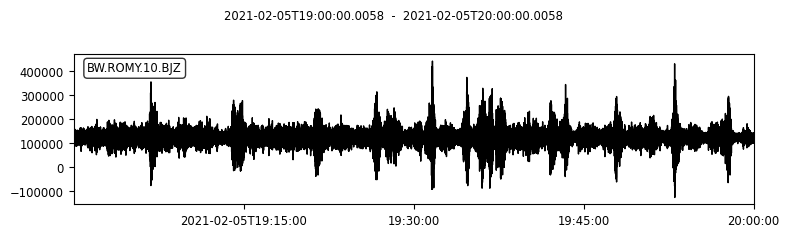

1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2021-02-05T19:00:00.005800Z - 2021-02-05T20:00:00.005800Z | 20.0 Hz, 72001 samples

In [3]:
if len(st) > 1:
    
    tr =  st[0] + st[1]
    st = obs.core.stream.Stream(tr)
    st.resample(st[0].stats.sampling_rate)
    
st.plot();
st

In [4]:
# st.resample(1.0)

print("detrend")
st.detrend("simple")

if cha[0] == "B":
    
    from obspy.clients.fdsn import RoutingClient
   
    print("remove response")

    route = RoutingClient("eida-routing")
    inv = route.get_stations(network=net, station=sta, level="response")
    st.remove_response(inv)
    
    
else:
    st[0].data = st[0].data/1e6
    print("divide by 1e6")
    
    

detrend
remove response


In [5]:
## define tau range e.g. 5 (= 10⁵) and number of samples N
upper = 3
lower = -3
N = 1000

## list of tau values in seconds
taux = np.logspace(lower, upper, N)

## smallest sampling in seconds
dtaux = taux[1]-taux[0]


In [6]:

## normal allan deviation
(taus1, adevs1, errors, ns) = allantools.adev(st[0].data, 
                                              data_type="freq", 
                                              rate=st[0].stats.sampling_rate, 
                                              taus=taux,
                                             )

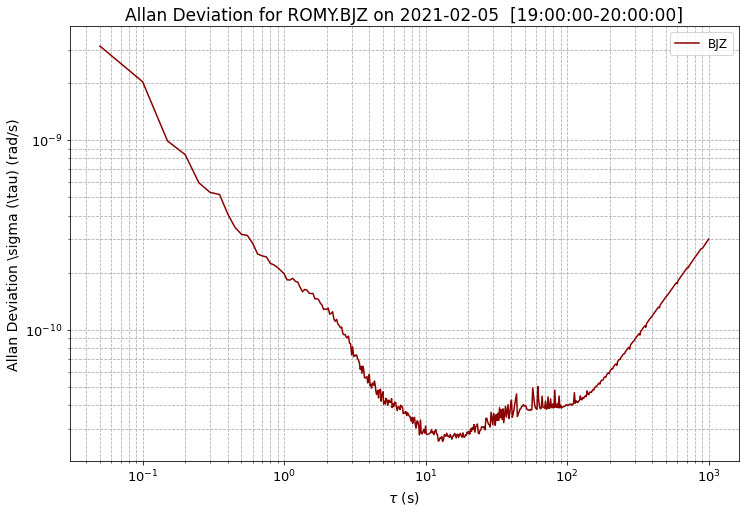

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

font = 14

# ax.scatter(taus1, adevs1, color='r')
ax.plot(taus1, adevs1, color='darkred', label=f"{cha}")

# ax.plot(tau_wn, ad_wn, color='grey', label="modified")


day = st[0].stats.starttime.date
tt1 = str(st[0].stats.starttime.time)[:8]
tt2 = str(st[0].stats.endtime.time)[:8]

ax.set_title(f"Allan Deviation for {sta}.{cha} on {day}  [{tt1}-{tt2}]", fontsize=font+3)
ax.set_xlabel(r"$\tau$ (s)", fontsize=font)
ax.set_ylabel(r"Allan Deviation \sigma (\tau) (rad/s)", fontsize=font)

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize=font-2)

ax.grid(True, which="both", ls="--")


# ax.set_yticks([1e-9, 1e-10])
ax.tick_params(labelsize=font-1)

plt.show();